# Prédiction de la Satisfaction Client

Ce projet a pour objectif de prédire la satisfaction des clients en utilisant des modèles de machine learning, afin de mieux comprendre les facteurs qui influencent la satisfaction et d'aider à l'amélioration des stratégies d'engagement client.

Nous allons explorer le dataset, le préparer pour la modélisation, et utiliser plusieurs algorithmes pour évaluer leurs performances.

## Les étapes clés du projet sont :
1. **Exploration des données (EDA)** : Analyser et comprendre la structure des données.
2. **Préparation des données** : Nettoyage et transformation des données pour la modélisation.
3. **Modélisation avec plusieurs algorithmes** : Régression Logistique, Random Forest, et d'autres si pertinent.
4. **Évaluation et conclusion** : Mesurer la performance des modèles et tirer des conclusions.


## 1. Charger le Dataset

Dans cette étape, nous allons charger le fichier CSV contenant les données de satisfaction client en utilisant la bibliothèque `pandas`. Nous afficherons ensuite les premières lignes du dataset pour obtenir un aperçu de sa structure et vérifier que le fichier a été correctement chargé.


In [1]:
import pandas as pd

# Charger les données
try:
    data = pd.read_csv('Santander Customer Satisfaction - TRAIN.csv')
    print("Dataset chargé avec succès")
except FileNotFoundError:
    print("Erreur : Le fichier n'a pas été trouvé. Vérifiez le chemin du fichier.")
    
# Afficher les premières lignes du dataset
data.head()


Dataset chargé avec succès


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


## 2. Informations sur le Dataset

Dans cette étape, nous allons examiner la structure générale du dataset pour mieux comprendre sa composition. Nous allons notamment :
- Vérifier le nombre de lignes et de colonnes.
- Obtenir des informations sur les types de données dans chaque colonne.
- Rechercher des valeurs manquantes qui pourraient nécessiter un traitement avant la modélisation.



In [2]:
# Afficher les dimensions du dataset (lignes, colonnes)
print(f"Dimensions du dataset: {data.shape}")


Dimensions du dataset: (76020, 371)


### Types de données dans le Dataset

Nous allons maintenant examiner les types de données dans chaque colonne et vérifier combien de valeurs manquantes il y a dans chaque colonne. Cela nous aidera à identifier les colonnes qui nécessitent une attention particulière lors du prétraitement.


In [3]:
# Afficher les informations sur les types de données et les colonnes
data.info()

# Vérification des valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne:")
print(missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
Valeurs manquantes par colonne:
Series([], dtype: int64)


### Conclusion sur les informations du dataset

Le dataset contient 76,020 lignes et 371 colonnes, sans valeurs manquantes. Nous avons des colonnes numériques de type `int64` et `float64`, ce qui est compatible avec les algorithmes de machine learning. Il n'y a pas de valeurs manquantes dans les données, ce qui simplifie le prétraitement. 

Nous allons maintenant vérifier les doublons et les colonnes avec des valeurs uniques avant de passer à l'étape de préparation des données.


In [4]:
duplicate_rows = data.duplicated().sum()
print(f"Nombre de lignes dupliquées: {duplicate_rows}")

Nombre de lignes dupliquées: 0


In [5]:
unique_counts = data.nunique()
print("Colonnes avec une seule valeur:")
print(unique_counts[unique_counts == 1])


Colonnes avec une seule valeur:
ind_var2_0                       1
ind_var2                         1
ind_var27_0                      1
ind_var28_0                      1
ind_var28                        1
ind_var27                        1
ind_var41                        1
ind_var46_0                      1
ind_var46                        1
num_var27_0                      1
num_var28_0                      1
num_var28                        1
num_var27                        1
num_var41                        1
num_var46_0                      1
num_var46                        1
saldo_var28                      1
saldo_var27                      1
saldo_var41                      1
saldo_var46                      1
imp_amort_var18_hace3            1
imp_amort_var34_hace3            1
imp_reemb_var13_hace3            1
imp_reemb_var33_hace3            1
imp_trasp_var17_out_hace3        1
imp_trasp_var33_out_hace3        1
num_var2_0_ult1                  1
num_var2_ult1          

In [6]:
# Identification des colonnes à supprimer
cols_to_drop = unique_counts[unique_counts == 1].index

# Suppression des colonnes
data_cleaned = data.drop(columns=cols_to_drop)

print(f"Nombre de colonnes après suppression : {data_cleaned.shape[1]}")


Nombre de colonnes après suppression : 337


### Conclusion sur les doublons et les colonnes avec une seule valeur

- Il n'y a pas de lignes dupliquées dans le dataset, donc aucune suppression n'est nécessaire à ce niveau.
- Plusieurs colonnes ne contiennent qu'une seule valeur, ce qui les rend inutiles pour la modélisation. Ces colonnes ont été supprimées pour simplifier l'analyse. 

Nous allons maintenant passer à l'étape de **préparation des données**, où nous traiterons les transformations nécessaires avant la modélisation.


## 3. Statistiques Descriptives

j'afficherai des statistiques descriptives des variables numériques pour comprendre leur distribution, les moyennes, les écarts-types, et les valeurs minimales/maximales.


In [7]:
# Statistiques descriptives pour les variables numériques
data_cleaned.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


### Conclusion des Statistiques Descriptives

- Le dataset contient 76 020 lignes, et les colonnes affichées par `.describe()` ne contiennent pas de valeurs manquantes, ce qui est un bon indicateur de la qualité des données.
- Certaines colonnes, comme `var3`, présentent des valeurs aberrantes (par exemple, `-999999`), qui pourraient représenter des erreurs de saisie ou des valeurs manquantes mal codées. Ces colonnes devront être nettoyées avant de procéder à la modélisation.
- Les écarts-types importants dans certaines colonnes (par exemple, `var3`) indiquent une forte dispersion des données, ce qui pourrait nécessiter une normalisation ou standardisation pour que les algorithmes de machine learning puissent mieux performer.
- La colonne cible (`TARGET`) présente une distribution binaire (`0` et `1`), ce qui est conforme à un problème de classification binaire.
  

In [8]:
# Afficher la répartition des valeurs pour les colonnes catégorielles
for col in data_cleaned.select_dtypes(include=['object']).columns:
    print(f"Répartition pour {col} :")
    print(data_cleaned[col].value_counts())
    print("\n")


### Vérification des valeurs aberrantes (Outliers)

Dans cette étape, nous allons utiliser des boîtes (boxplots) pour identifier les valeurs aberrantes dans les colonnes numériques. Les valeurs éloignées de la distribution normale peuvent affecter les modèles de machine learning, il est donc important de les identifier.


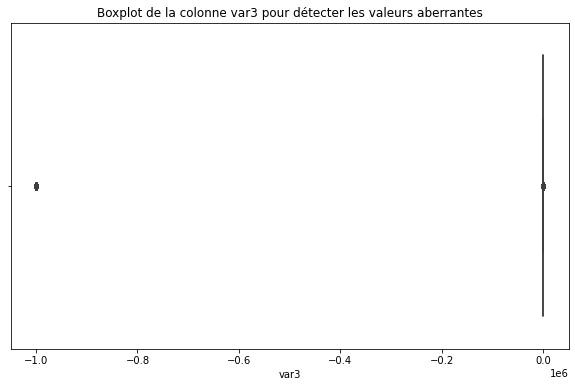

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple avec la colonne var3 pour visualiser les valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['var3'])
plt.title("Boxplot de la colonne var3 pour détecter les valeurs aberrantes")
plt.show()



### Traitement des valeurs aberrantes pour `var3`

Pour gérer les valeurs aberrantes dans la colonne `var3`, nous remplacerons les valeurs extrêmement négatives qui sont probablement des erreurs ou des valeurs de remplissage par la médiane des autres valeurs. Nous conserverons les valeurs élevées, car elles peuvent être des observations valides.


In [10]:
# Calcul de la médiane sans prendre en compte les valeurs extrêmes négatives
median_var3 = data_cleaned.loc[data_cleaned['var3'] > -999999, 'var3'].median()

# Remplacement des valeurs extrêmes négatives par la médiane
data_cleaned['var3'].replace(to_replace=-999999, value=median_var3, inplace=True)

# Affichage pour vérification
print(f"La médiane calculée pour 'var3' est : {median_var3}")
data_cleaned['var3'].describe()


La médiane calculée pour 'var3' est : 2.0


count    76020.000000
mean         2.716483
std          9.447971
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        238.000000
Name: var3, dtype: float64

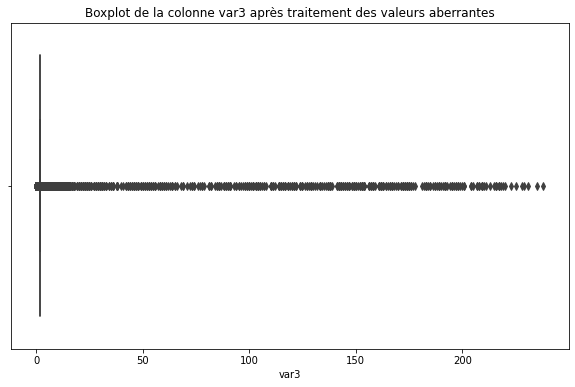

In [11]:
# Boxplot de 'var3' après le traitement des valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['var3'])
plt.title("Boxplot de la colonne var3 après traitement des valeurs aberrantes")
plt.show()


### Visualisation de la distribution des variables numériques

Nous allons maintenant visualiser la distribution des variables numériques en utilisant des histogrammes. Cela nous permettra de vérifier si les données sont normalement distribuées ou s'il y a des asymétries dans la répartition des valeurs.


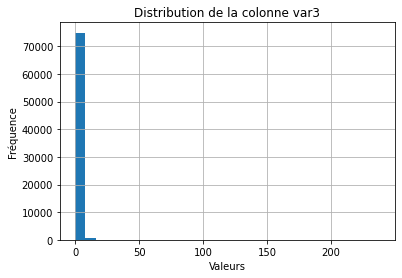

In [12]:
# Visualisation de la distribution de la colonne var3
data_cleaned['var3'].hist(bins=30)
plt.title("Distribution de la colonne var3")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.show()


### Analyse de la Skewness (Asymétrie) et de la Kurtosis (Aplatissement)

Nous allons maintenant calculer la skewness (asymétrie) et la kurtosis (aplatissement) des variables numériques. Une forte asymétrie peut indiquer des valeurs aberrantes, et une kurtosis élevée peut montrer la présence de valeurs très éloignées de la moyenne.


In [13]:
# Calcul de la skewness et de la kurtosis
skewness = data_cleaned.skew()
kurtosis = data_cleaned.kurt()

print("Skewness des variables :")
print(skewness)

print("\nKurtosis des variables :")
print(kurtosis)


Skewness des variables :
ID                          -0.001998
var3                        16.881007
var15                        1.578367
imp_ent_var16_ult1          67.267512
imp_op_var39_comer_ult1      9.454298
                              ...    
saldo_medio_var44_hace3    120.067707
saldo_medio_var44_ult1     104.133358
saldo_medio_var44_ult3      93.956775
var38                       51.274532
TARGET                       4.723842
Length: 337, dtype: float64

Kurtosis des variables :
ID                            -1.197633
var3                         306.080942
var15                          2.519919
imp_ent_var16_ult1          6321.435132
imp_op_var39_comer_ult1      145.398198
                               ...     
saldo_medio_var44_hace3    16768.183173
saldo_medio_var44_ult1     13897.745166
saldo_medio_var44_ult3     10842.213607
var38                       4219.873445
TARGET                        20.315220
Length: 337, dtype: float64


### Application d'une transformation logarithmique

Pour atténuer l'impact de l'asymétrie et des valeurs aberrantes, nous appliquerons une transformation logarithmique aux variables avec une skewness élevée.


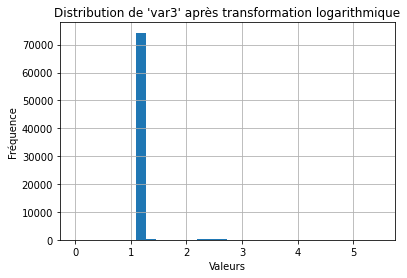

In [14]:
import numpy as np

# Application de la transformation logarithmique à 'var3' en ajoutant 1 pour éviter le log de zéro
data_cleaned['var3_log'] = np.log(data_cleaned['var3'] + 1 - data_cleaned['var3'].min())

# Visualisation de la distribution après transformation
data_cleaned['var3_log'].hist(bins=30)
plt.title("Distribution de 'var3' après transformation logarithmique")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.show()


### Préparation des données 


## 4. Vérification des Valeurs Manquantes
Nous allons maintenant examiner le dataset pour identifier et traiter les valeurs manquantes, en utilisant l'imputation ou la suppression, selon le contexte.


In [15]:
# Imputation des valeurs manquantes par la médiane
data_cleaned.fillna(data_cleaned.median(), inplace=True)



### Encodage des variables catégorielles

Pour préparer notre dataset pour la modélisation, nous convertirons les variables catégorielles en formats numériques en utilisant l'encodage one-hot.


## 5. Distribution de la Variable Cible

je vais visualiser la distribution de la variable `TARGET`, qui indique si un client est satisfait (0) ou insatisfait (1). Cela nous permettra de vérifier l'équilibre entre les classes.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


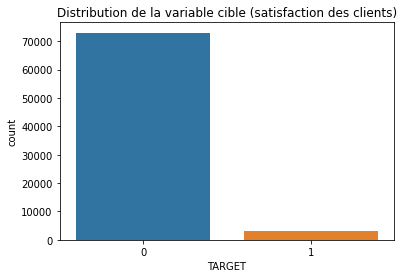

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data['TARGET'])
plt.title("Distribution de la variable cible (satisfaction des clients)")
plt.show()


## 6. Corrélations entre les Variables

je vais calculer la corrélation entre les caractéristiques du dataset et la variable `TARGET`. Cela m'aiderai à identifier les variables les plus corrélées avec la satisfaction client.


In [17]:
correlation = data.corr()['TARGET'].sort_values(ascending=False)

print("Top 10 des variables les plus corrélées avec TARGET :")
print(correlation.head(10))

print("\nTop 10 des variables les moins corrélées avec TARGET :")
print(correlation.tail(10))


Top 10 des variables les plus corrélées avec TARGET :
TARGET                     1.000000
var36                      0.102919
var15                      0.101322
ind_var8_0                 0.046665
num_var8_0                 0.046622
imp_op_var39_efect_ult1    0.030380
imp_op_var41_efect_ult1    0.029479
num_var8                   0.027926
ind_var8                   0.027926
imp_op_var41_ult1          0.027586
Name: TARGET, dtype: float64

Top 10 des variables les moins corrélées avec TARGET :
imp_trasp_var17_out_hace3       NaN
imp_trasp_var33_out_hace3       NaN
num_var2_0_ult1                 NaN
num_var2_ult1                   NaN
num_reemb_var13_hace3           NaN
num_reemb_var33_hace3           NaN
num_trasp_var17_out_hace3       NaN
num_trasp_var33_out_hace3       NaN
saldo_var2_ult1                 NaN
saldo_medio_var13_medio_hace3   NaN
Name: TARGET, dtype: float64


### Rééquilibrage des classes avec SMOTE

Pour traiter le déséquilibre significatif entre les classes, nous utiliserons SMOTE pour augmenter la taille de la classe minoritaire en générant des exemples synthétiques.


In [18]:
from imblearn.over_sampling import SMOTE

# Définir les données d'entrée et la cible
X = data_cleaned.drop('TARGET', axis=1)
y = data_cleaned['TARGET']

# Initialisation de SMOTE et rééquilibrage des classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Vérification de l'équilibre des classes après SMOTE
print("Distribution des classes après SMOTE :")
print(y_res.value_counts())


Distribution des classes après SMOTE :
1    73012
0    73012
Name: TARGET, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


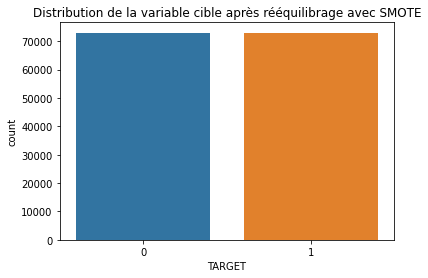

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(y_res)
plt.title("Distribution de la variable cible après rééquilibrage avec SMOTE")
plt.show()


### Division du dataset en ensembles d'entraînement et de test

Pour évaluer la performance de nos modèles, nous diviserons les données en un ensemble d'entraînement et un ensemble de test. Cela nous permettra de tester la capacité de notre modèle à généraliser à de nouvelles données non vues lors de la formation.


In [20]:
from sklearn.model_selection import train_test_split

# Utilisation des données rééquilibrées de SMOTE ou des données originales selon la stratégie choisie
X = X_res  # ou X si vous n'avez pas utilisé SMOTE
y = y_res  # ou y si vous n'avez pas utilisé SMOTE

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)


Taille de l'ensemble d'entraînement : (102216, 337)
Taille de l'ensemble de test : (43808, 337)


### Entraînement du modèle

Nous sélectionnerons un modèle adapté pour notre problème de classification binaire et l'entraînerons avec notre ensemble d'entraînement.


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle
model = RandomForestClassifier(random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test pour une évaluation initiale
y_pred = model.predict(X_test)


### Évaluation du modèle

Nous évaluerons notre modèle en utilisant plusieurs métriques pour comprendre sa performance sur l'ensemble de test.


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Affichage des métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)


Accuracy: 0.9638193937180424
Precision: 0.9649170892147458
Recall: 0.9627620783956244
F1 Score: 0.9638383792293126
AUC: 0.9638211343139635


In [24]:
import pickle
# Sauvegarder le modèle
pickle.dump(model, open('model.pkl', 'wb'))
